# Solar Assessment

### Setup

Import required packages for effective operation of notebook.

In [251]:
# Import Pandas for data frames
import pandas as pd

# Import Numpy
import numpy as np

# Import Seaborn for plotting
import seaborn as sns

# Import matplotlib for plot adjustments
import matplotlib as plt


### Assessment Steps

1. Clean and review 'energy_usage' data in preparation for analysis.
2. Determine piek usage periods and general trends
3. Prepare 'solar_generation' data for assessment
4. Compare both files to determine:
    - Estimated annual energy saving
    - Benefit of battery install
    - 

#### _1. Clean & Review Usage Data_

Usage data can be obtained from [ESB Networks](https://www.esbnetworks.ie/services/manage-my-meter/about-smart-meters?https://www.esbnetworks.ie/services/manage-my-meter/about-smart-meters&gclsrc=aw.ds&gad_source=1&gad_campaignid=13801609571&gbraid=0AAAAADg-OV56fXOruwBwK5fnkCqsCekBB&gclid=EAIaIQobChMI1Pvrq-6KkQMVbZNQBh1BSCRQEAAYASAAEgIBBfD_BwE) using the intended connection MPRN number. Several diferent levels of information can be downloaded, but for the purpose of this review, daily meter readings was downloaded. This data goes back for a period of 2 years. The file is titled 'meter_readings', located in the 'data' folder.

The first step is a quick check to confirm the 'data' directory is there, and has the 'meter_readings.csv' file within it.

In [252]:
# Check the directory and file are there
!dir "./data"

 Volume in drive C is OS
 Volume Serial Number is 74A1-F0F8

 Directory of c:\Users\danie\Course\PFDA\project\data

24/11/2025  13:17    <DIR>          .
24/11/2025  11:46    <DIR>          ..
19/11/2025  19:01         2,364,737 check.csv
23/11/2025  17:21         5,729,394 daily.csv
24/11/2025  14:04           135,287 meter_readings.csv
               3 File(s)      8,229,418 bytes
               2 Dir(s)  368,776,994,816 bytes free


Now that the file name and location are confirmed, the CSV file can be pulled in as a data frame.

In [253]:
# Data location
url = "./data/"

# Specify filename
filename="meter_readings.csv"

# Read .cvs into a data frame
df_usage = pd.read_csv(url + filename)

# Show first 5 rows
df_usage.head()

,MPRN,Meter Serial Number,Read Value,Read Type,Read Date and End Time
0,10010476926,22321325,6508.562,24 Hr Active Import Register (kWh),22-11-2025 00:00
1,10010476926,22321325,6964.831,24 Hr Active Export Register (kWh),22-11-2025 00:00
2,10010476926,22321325,6502.153,24 Hr Active Import Register (kWh),21-11-2025 00:00
3,10010476926,22321325,6964.473,24 Hr Active Export Register (kWh),21-11-2025 00:00
4,10010476926,22321325,6493.930,24 Hr Active Import Register (kWh),20-11-2025 00:00


For simplicity in coding later on, the 'Read Date and End Time' column will be renamed to just 'Date'.

In [254]:
# Rename column
df_usage = df_usage.rename(columns={'Read Date and End Time':'Date'})

# Show first 5 rows to confirm
df_usage.head()

,MPRN,Meter Serial Number,Read Value,Read Type,Date
0,10010476926,22321325,6508.562,24 Hr Active Import Register (kWh),22-11-2025 00:00
1,10010476926,22321325,6964.831,24 Hr Active Export Register (kWh),22-11-2025 00:00
2,10010476926,22321325,6502.153,24 Hr Active Import Register (kWh),21-11-2025 00:00
3,10010476926,22321325,6964.473,24 Hr Active Export Register (kWh),21-11-2025 00:00
4,10010476926,22321325,6493.930,24 Hr Active Import Register (kWh),20-11-2025 00:00


For manipulating and reviewing the data, the date must be converted to a common datetime format.

In [255]:
# Show 'Date' column
df_usage['Date']

0       22-11-2025 00:00
1       22-11-2025 00:00
2       21-11-2025 00:00
3       21-11-2025 00:00
4       20-11-2025 00:00
              ...       
1449    25-11-2023 00:00
1450    24-11-2023 00:00
1451    24-11-2023 00:00
1452    23-11-2023 00:00
1453    23-11-2023 00:00
Name: Date, Length: 1454, dtype: object

It can be seen that the date is currently captured in a DD-MM-YY HH:MM format. This must be specified in the code, so that datetime format can be applied.

In [256]:
# Convert the date and time to a common datetime format.
pd.to_datetime(df_usage['Date'], format='%d-%m-%Y %H:%M')

0      2025-11-22
1      2025-11-22
2      2025-11-21
3      2025-11-21
4      2025-11-20
          ...    
1449   2023-11-25
1450   2023-11-24
1451   2023-11-24
1452   2023-11-23
1453   2023-11-23
Name: Date, Length: 1454, dtype: datetime64[ns]

This is now in datetime format however, it can be seen that the hours and minutes have been dropped. Datetime does this when the hours and minutes are 00:00. This is acceptable, as it will not impact any later coding.

the next step is to apply the new datetime format to the data frame.

In [257]:
# Apply datetime format to 'Date' column
df_usage["Date"]= pd.to_datetime(df_usage['Date'], format='%d-%m-%Y %H:%M')

# Show first 5 rows
df_usage.head()

,MPRN,Meter Serial Number,Read Value,Read Type,Date
0,10010476926,22321325,6508.562,24 Hr Active Import Register (kWh),2025-11-22
1,10010476926,22321325,6964.831,24 Hr Active Export Register (kWh),2025-11-22
2,10010476926,22321325,6502.153,24 Hr Active Import Register (kWh),2025-11-21
3,10010476926,22321325,6964.473,24 Hr Active Export Register (kWh),2025-11-21
4,10010476926,22321325,6493.930,24 Hr Active Import Register (kWh),2025-11-20


The Date column can now be set as the index.

In [258]:
# Set 'Date' column as index of dataframe
df_usage.set_index('Date', inplace=True)

# Show first 5 rows
df_usage.head()

,MPRN,Meter Serial Number,Read Value,Read Type
Date,,,,
2025-11-22,10010476926,22321325,6508.562,24 Hr Active Import Register (kWh)
2025-11-22,10010476926,22321325,6964.831,24 Hr Active Export Register (kWh)
2025-11-21,10010476926,22321325,6502.153,24 Hr Active Import Register (kWh)
2025-11-21,10010476926,22321325,6964.473,24 Hr Active Export Register (kWh)
2025-11-20,10010476926,22321325,6493.930,24 Hr Active Import Register (kWh)


In [259]:
# Show last 5 rows
df_usage.tail()

,MPRN,Meter Serial Number,Read Value,Read Type
Date,,,,
2023-11-25,10010476926,22321325,1922.926,24 Hr Active Export Register (kWh)
2023-11-24,10010476926,22321325,1921.251,24 Hr Active Export Register (kWh)
2023-11-24,10010476926,22321325,1338.152,24 Hr Active Import Register (kWh)
2023-11-23,10010476926,22321325,1921.190,24 Hr Active Export Register (kWh)
2023-11-23,10010476926,22321325,1327.517,24 Hr Active Import Register (kWh)


It can be seen in the 'Read Type' column that there are 2 different rows; Import and Export. For the purpose of this, we only need to conside Import ie. power consumed by the household.

In [260]:
# Remove export rows, and focus solely on import
df_import = df_usage[df_usage["Read Type"] == "24 Hr Active Import Register (kWh)"]

# Show firts 5 rows
df_import.head()

,MPRN,Meter Serial Number,Read Value,Read Type
Date,,,,
2025-11-22,10010476926,22321325,6508.562,24 Hr Active Import Register (kWh)
2025-11-21,10010476926,22321325,6502.153,24 Hr Active Import Register (kWh)
2025-11-20,10010476926,22321325,6493.930,24 Hr Active Import Register (kWh)
2025-11-19,10010476926,22321325,6485.778,24 Hr Active Import Register (kWh)
2025-11-18,10010476926,22321325,6475.004,24 Hr Active Import Register (kWh)


Now the unrequired columns can be removed.

In [261]:
# Comfirm all column names
headers = df_import.columns.tolist()

# Show list
headers

['MPRN', 'Meter Serial Number', 'Read Value', 'Read Type']

In [262]:
# Create list of columns to remove
drop_col_list = ['MPRN','Meter Serial Number','Read Type']

# Remove columns list
df_import.drop(columns=drop_col_list, inplace=True)

# Show first 5 rows.
df_import.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_25272\1613923774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_import.drop(columns=drop_col_list, inplace=True)


,Read Value
Date,
2025-11-22,6508.562
2025-11-21,6502.153
2025-11-20,6493.930
2025-11-19,6485.778
2025-11-18,6475.004


This now leaves a simple data frame, with 2 columns, the index (Date) and 'Read Value'. The index can now be reset.

In [263]:
#daily_con = daily_con.reset_index()
df_import = df_import.reset_index()
#daily_con.head()

df_import.head()

,Date,Read Value
0,2025-11-22,6508.562
1,2025-11-21,6502.153
2,2025-11-20,6493.930
3,2025-11-19,6485.778
4,2025-11-18,6475.004


A line plot can now be created to confirm there are now data anomilies. Show have a realively smooth line, continually increasing.

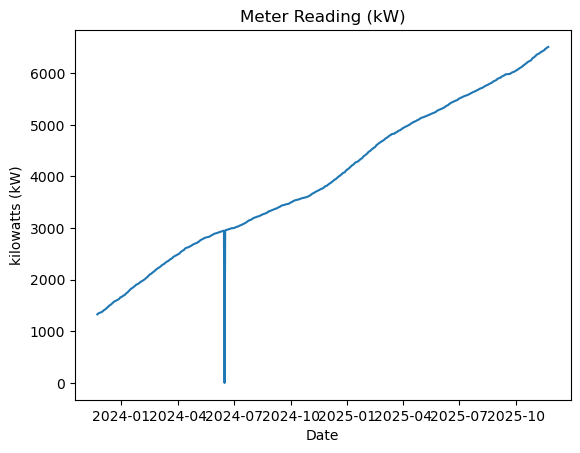

In [264]:
# Use seaborn to create lineplot, specifying Date on x-axis, and Read Value on y-axis
ax = sns.lineplot(data=df_import, x="Date", y="Read Value")

# Specify plot title
ax.set_title('Meter Reading (kW)')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts (kW)');

It can be seen that on some dates, the meter reading was 0.0. This was an error on the ESB Networks system, so to rectify, back fill will be used, applying the meter reading number from the day prior. This will show a usage of 0.0 kW for the given days, but given the small amount of them, it won't impact the overall results.

In [265]:
# Replace all 0.0 with prior date details.
df_import = df_import.replace(0.0, method='ffill')

C:\Users\danie\AppData\Local\Temp\ipykernel_25272\198687436.py:2: FutureWarning: The 'method' keyword in DataFrame.replace is deprecated and will be removed in a future version.
  df_import = df_import.replace(0.0, method='ffill')


A repeat linepolt can now be created to confirm a smooth line.

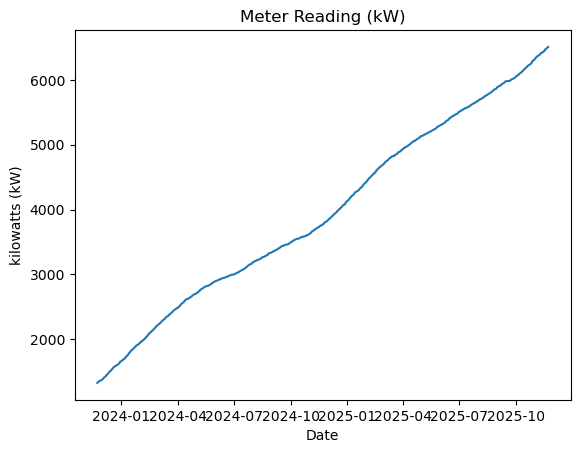

In [266]:
# Create lineplot
ax = sns.lineplot(data=df_import, x="Date", y="Read Value")

# Plot title
ax.set_title('Meter Reading (kW)')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts (kW)');

It can be seen that there are no dips in the line, therefore the data can be considered clean, allowing it to be analysed.

To do this, the meter readings need to be converted to daily consumption. This is determined in the difference of the current and previous days reading. The results are applied to a new column (Usage)

In [267]:
# Calculate difference with previous row
# Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html
df_import["Usage"] = df_import["Read Value"].diff()

# Show first 5 rows
df_import.head()


,Date,Read Value,Usage
0,2025-11-22,6508.562,NaN
1,2025-11-21,6502.153,-6.409
2,2025-11-20,6493.930,-8.223
3,2025-11-19,6485.778,-8.152
4,2025-11-18,6475.004,-10.774


Given the results are negative, the ``.diff()`` command needs to be changed to calculate against the following row. This is done by applying ``-1`` within the brackets.

In [268]:
# Calculate difference with following row
df_import["Usage"] = df_import["Read Value"].diff(-1)

# Show first 5 rows
df_import.head()

,Date,Read Value,Usage
0,2025-11-22,6508.562,6.409
1,2025-11-21,6502.153,8.223
2,2025-11-20,6493.930,8.152
3,2025-11-19,6485.778,10.774
4,2025-11-18,6475.004,5.513


In [269]:
# Show last 5 rows
df_import.tail()

,Date,Read Value,Usage
722,2023-11-27,1357.457,3.916
723,2023-11-26,1353.541,4.739
724,2023-11-25,1348.802,10.650
725,2023-11-24,1338.152,10.635
726,2023-11-23,1327.517,NaN


It can be seen that the earlies date returns a NaN, as it has no previous number to reference off.

A lineplot can be created of the usage, to get a visual.

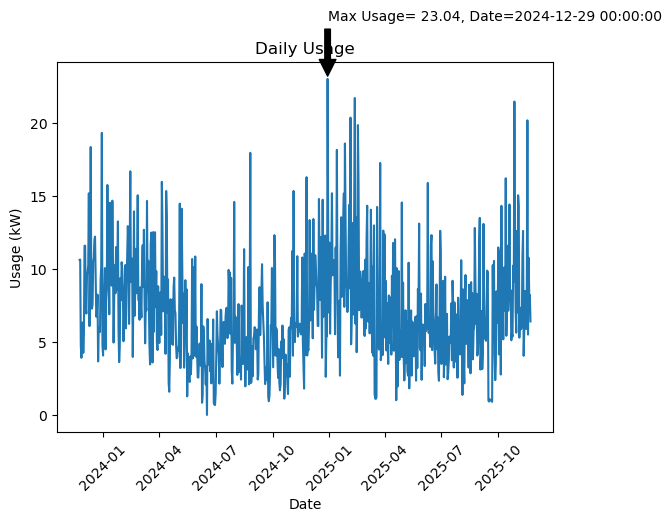

In [270]:
# Create lineplot
ax = sns.lineplot(data=df_import, x="Date", y="Usage")

# Specify plot title
ax.set_title('Daily Usage')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('Usage (kW)')

# Rotate axis test
# Source: https://www.geeksforgeeks.org/python/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
ax.tick_params(axis='x', labelrotation=45)


ymax = df_import['Usage'].max()
xpos = df_import['Usage'].idxmax()
xmax = df_import.loc[xpos, 'Date']
annotation_text = f"Max Usage={ymax: .2f}, Date={xmax}"


ax.annotate(annotation_text, xy=(xmax, ymax), xytext=(xmax, ymax+4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            );

Understandably this does show a trend, of higher consumption in the winter days when compared to summer. A further graph can be plotted, capturing the weekly and monthly trends.

In [271]:
# Determing the weekly ('WE') sum
df_import_wkly = df_import.set_index('Date')

# Show first 5 rows
df_import_wkly.head()

,Read Value,Usage
Date,,
2025-11-22,6508.562,6.409
2025-11-21,6502.153,8.223
2025-11-20,6493.930,8.152
2025-11-19,6485.778,10.774
2025-11-18,6475.004,5.513


In [272]:
# Determing the weekly ('W') usage
df_import_wkly = df_import_wkly["Usage"].resample('W').sum().reset_index(name='Usage')

# Show first 5 rows
df_import_wkly.head()

,Date,Usage
0,2023-11-26,26.024
1,2023-12-03,48.922
2,2023-12-10,65.315
3,2023-12-17,71.442
4,2023-12-24,59.215


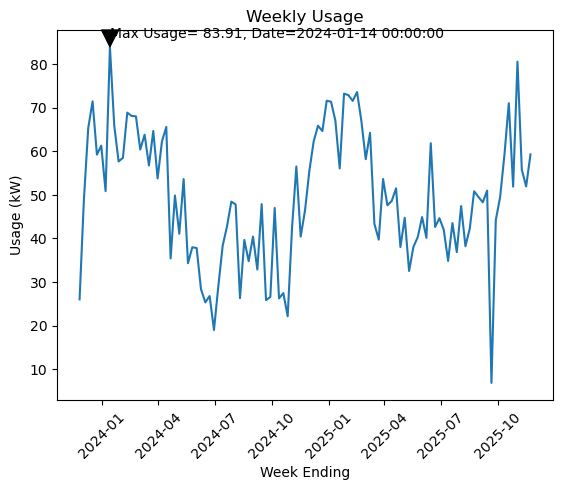

In [273]:
# Create lineplot
ax = sns.lineplot(data=df_import_wkly, x="Date", y="Usage")

# Specify plot title
ax.set_title('Weekly Usage')

# Adjust names of axes.
ax.set_xlabel('Week Ending')
ax.set_ylabel('Usage (kW)')

# Rotate axis test
ax.tick_params(axis='x', labelrotation=45)


ymax = df_import_wkly['Usage'].max()
xpos = df_import_wkly['Usage'].idxmax()
xmax = df_import_wkly.loc[xpos, 'Date']
annotation_text = f"Max Usage={ymax: .2f}, Date={xmax}"


ax.annotate(annotation_text, xy=(xmax, ymax), xytext=(xmax, ymax+2),
            arrowprops=dict(facecolor='black', shrink=0.04),
            );

In [274]:
# Determing the weekly ('WE') sum
df_import_mtly = df_import.set_index('Date')

# Show first 5 rows
df_import_mtly.head()

,Read Value,Usage
Date,,
2025-11-22,6508.562,6.409
2025-11-21,6502.153,8.223
2025-11-20,6493.930,8.152
2025-11-19,6485.778,10.774
2025-11-18,6475.004,5.513


In [275]:
# Determing the monthly ('ME') usage
df_import_mtly = df_import_mtly["Usage"].resample('ME').sum().reset_index(name='Usage')

# Show first 5 rows
df_import_mtly.head()

,Date,Usage
0,2023-11-30,46.205
1,2023-12-31,285.982
2,2024-01-31,285.988
3,2024-02-29,273.026
4,2024-03-31,261.934


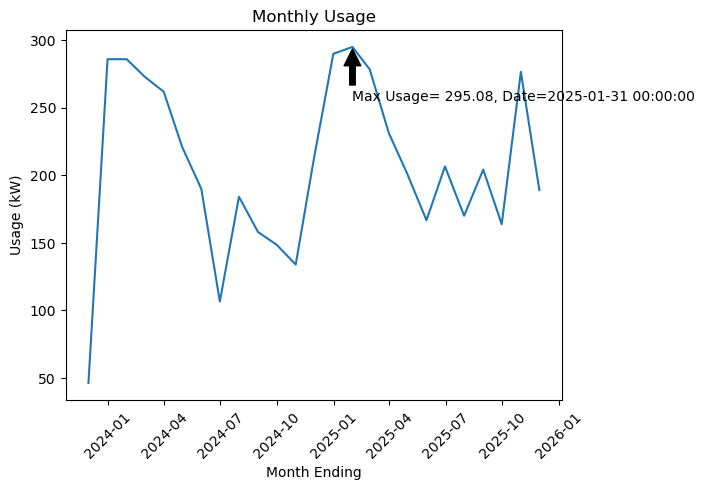

In [276]:
# Create lineplot
ax = sns.lineplot(data=df_import_mtly, x="Date", y="Usage")

# Specify plot title
ax.set_title('Monthly Usage')

# Adjust names of axes.
ax.set_xlabel('Month Ending')
ax.set_ylabel('Usage (kW)')

# Rotate axis test
ax.tick_params(axis='x', labelrotation=45)


ymax = df_import_mtly['Usage'].max()
xpos = df_import_mtly['Usage'].idxmax()
xmax = df_import_mtly.loc[xpos, 'Date']
annotation_text = f"Max Usage={ymax: .2f}, Date={xmax}"


ax.annotate(annotation_text, xy=(xmax, ymax), xytext=(xmax, ymax-40),
            arrowprops=dict(facecolor='black', shrink=0.05),
            );

## Generation

In [277]:
# Data location
url = "./data/"

filename="check.csv"
# Read CVS into a data frame, skipping first 23 rows as these are just acronym definitions
df = pd.read_csv(url + filename, skiprows=10)

# Show first 5 rows
df.head()

,time,P,G(i),H_sun,T2m,WS10m,Int
0,20180101:0011,0.0,0.0,0.0,6.51,5.72,0.0
1,20180101:0111,0.0,0.0,0.0,6.28,5.38,0.0
2,20180101:0211,0.0,0.0,0.0,5.98,4.83,0.0
3,20180101:0311,0.0,0.0,0.0,5.98,4.28,0.0
4,20180101:0411,0.0,0.0,0.0,5.90,4.07,0.0


In [278]:
# Show 'time' column
df["time"]

0                                            20180101:0011
1                                            20180101:0111
2                                            20180101:0211
3                                            20180101:0311
4                                            20180101:0411
                               ...                        
52586                           H_sun: Sun height (degree)
52587            T2m: 2-m air temperature (degree Celsius)
52588                   WS10m: 10-m total wind speed (m/s)
52589    Int: 1 means solar radiation values are recons...
52590                             PVGIS (c) European Union
Name: time, Length: 52591, dtype: object

In [279]:
df.tail(10)

,time,P,G(i),H_sun,T2m,WS10m,Int
52581,20231231:2111,0.0,0.0,0.0,6.46,6.14,0.0
52582,20231231:2211,0.0,0.0,0.0,6.47,5.86,0.0
52583,20231231:2311,0.0,0.0,0.0,6.51,5.66,0.0
52584,P: PV system power (W),NaN,NaN,NaN,NaN,NaN,NaN
52585,G(i): Global irradiance on the inclined plane ...,NaN,NaN,NaN,NaN,NaN,NaN
52586,H_sun: Sun height (degree),NaN,NaN,NaN,NaN,NaN,NaN
52587,T2m: 2-m air temperature (degree Celsius),NaN,NaN,NaN,NaN,NaN,NaN
52588,WS10m: 10-m total wind speed (m/s),NaN,NaN,NaN,NaN,NaN,NaN
52589,Int: 1 means solar radiation values are recons...,NaN,NaN,NaN,NaN,NaN,NaN
52590,PVGIS (c) European Union,2001-2025,NaN,NaN,NaN,NaN,NaN


In [280]:
# Drop rows 52584 to 52590
# Source: https://stackoverflow.com/questions/61673097/dropping-multiple-ranges-of-rows-in-a-pandas-dataframe
df.drop(df.iloc[52584:52591].index, inplace=True)

# Show last 5 rows
df.tail()

,time,P,G(i),H_sun,T2m,WS10m,Int
52579,20231231:1911,0.0,0.0,0.0,6.72,6.07,0.0
52580,20231231:2011,0.0,0.0,0.0,6.60,6.21,0.0
52581,20231231:2111,0.0,0.0,0.0,6.46,6.14,0.0
52582,20231231:2211,0.0,0.0,0.0,6.47,5.86,0.0
52583,20231231:2311,0.0,0.0,0.0,6.51,5.66,0.0


In [281]:
# Show 'time' column
df["time"]

0        20180101:0011
1        20180101:0111
2        20180101:0211
3        20180101:0311
4        20180101:0411
             ...      
52579    20231231:1911
52580    20231231:2011
52581    20231231:2111
52582    20231231:2211
52583    20231231:2311
Name: time, Length: 52584, dtype: object

In [282]:
# Convert the date and time to a common datetime format.
pd.to_datetime(df['time'], format="%Y%m%d:%H%M")

0       2018-01-01 00:11:00
1       2018-01-01 01:11:00
2       2018-01-01 02:11:00
3       2018-01-01 03:11:00
4       2018-01-01 04:11:00
                ...        
52579   2023-12-31 19:11:00
52580   2023-12-31 20:11:00
52581   2023-12-31 21:11:00
52582   2023-12-31 22:11:00
52583   2023-12-31 23:11:00
Name: time, Length: 52584, dtype: datetime64[ns]

In [283]:
df["time"]= pd.to_datetime(df['time'], format='%Y%m%d:%H%M')

df.head()

,time,P,G(i),H_sun,T2m,WS10m,Int
0,2018-01-01 00:11:00,0.0,0.0,0.0,6.51,5.72,0.0
1,2018-01-01 01:11:00,0.0,0.0,0.0,6.28,5.38,0.0
2,2018-01-01 02:11:00,0.0,0.0,0.0,5.98,4.83,0.0
3,2018-01-01 03:11:00,0.0,0.0,0.0,5.98,4.28,0.0
4,2018-01-01 04:11:00,0.0,0.0,0.0,5.90,4.07,0.0


In [284]:
df.set_index('time', inplace=True)
df.head()

,P,G(i),H_sun,T2m,WS10m,Int
time,,,,,,
2018-01-01 00:11:00,0.0,0.0,0.0,6.51,5.72,0.0
2018-01-01 01:11:00,0.0,0.0,0.0,6.28,5.38,0.0
2018-01-01 02:11:00,0.0,0.0,0.0,5.98,4.83,0.0
2018-01-01 03:11:00,0.0,0.0,0.0,5.98,4.28,0.0
2018-01-01 04:11:00,0.0,0.0,0.0,5.90,4.07,0.0


In [285]:
df.loc["2018-01-01"]


,P,G(i),H_sun,T2m,WS10m,Int
time,,,,,,
2018-01-01 00:11:00,0.0,0.00,0.00,6.51,5.72,0.0
2018-01-01 01:11:00,0.0,0.00,0.00,6.28,5.38,0.0
2018-01-01 02:11:00,0.0,0.00,0.00,5.98,4.83,0.0
2018-01-01 03:11:00,0.0,0.00,0.00,5.98,4.28,0.0
2018-01-01 04:11:00,0.0,0.00,0.00,5.90,4.07,0.0
2018-01-01 05:11:00,0.0,0.00,0.00,6.06,4.21,0.0
2018-01-01 06:11:00,0.0,0.00,0.00,6.24,4.62,0.0
2018-01-01 07:11:00,0.0,0.00,0.00,5.66,4.90,0.0
2018-01-01 08:11:00,0.0,0.00,0.00,5.62,5.31,0.0


In [286]:
# Determing the daily ('D') mean, 
daily_gen = df["P"].resample('D').sum().reset_index(name='P')

# Show first 5 rows
daily_gen.head()

,time,P
0,2018-01-01,0.00.00.00.00.00.00.00.00.00.01073.082288.6467...
1,2018-01-02,0.00.00.00.00.00.00.00.00.00.0775.61314.19146....
2,2018-01-03,0.00.00.00.00.00.00.00.00.00.0473.7199.111786....
3,2018-01-04,0.00.00.00.00.00.00.00.00.00.0596.932789.58343...
4,2018-01-05,0.00.00.00.00.00.00.00.00.00.0602.712332.92670...


Above shows pandas sees the 'P' column as a string. This needs to be converted to integers so that the ``resample('D').sum()`` command works.

In [287]:
# Convert 'P' column to integers
df['P'] = pd.to_numeric(df['P'], errors='coerce')

# Determing the daily ('D') mean
# Divide by 1000 to convert to kilowatts (kW)
daily_gen = df["P"].resample('D').sum().div(1000).reset_index(name='P')

# Show first 5 rows
daily_gen.head()

,time,P
0,2018-01-01,4.01282
1,2018-01-02,1.45752
2,2018-01-03,6.00661
3,2018-01-04,12.97209
4,2018-01-05,4.15475


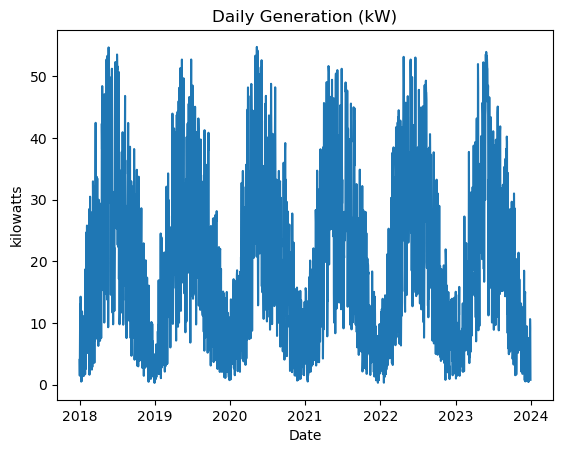

In [288]:
# Use seaborn to create lineplot, specifying date on x-axis, and meant on y-axis
ax = sns.lineplot(data=daily_gen, x="time", y="P")

# Specify plot title
ax.set_title('Daily Generation (kW)')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts');

In [289]:
# Determing the daily ('D') mean
# Divide by 1000 to convert to kilowatts (kW)
mtly_gen = df["P"].resample('ME').sum().div(1000).reset_index(name='P')

# Show first 5 rows
mtly_gen.head()

,time,P
0,2018-01-31,189.45451
1,2018-02-28,443.78805
2,2018-03-31,547.70398
3,2018-04-30,705.00821
4,2018-05-31,1091.50109


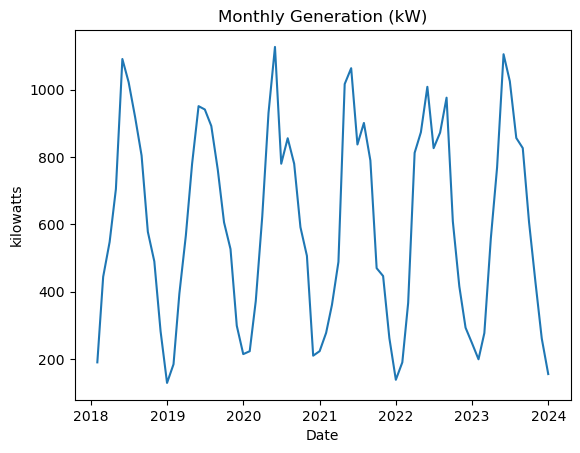

In [290]:
# Use seaborn to create lineplot, specifying date on x-axis, and meant on y-axis
ax = sns.lineplot(data=mtly_gen, x="time", y="P")

# Specify plot title
ax.set_title('Monthly Generation (kW)')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts');

In [291]:
# Determing the daily ('D') mean
# Divide by 1000 to convert to kilowatts (kW)
yrly_gen = df["P"].resample('YE').sum().div(1000).reset_index(name='P')

# Show first 5 rows
yrly_gen.head(7)

,time,P
0,2018-12-31,7201.07337
1,2019-12-31,7115.84844
2,2020-12-31,7221.27180
3,2021-12-31,7050.73423
4,2022-12-31,7489.58664
5,2023-12-31,7065.46954


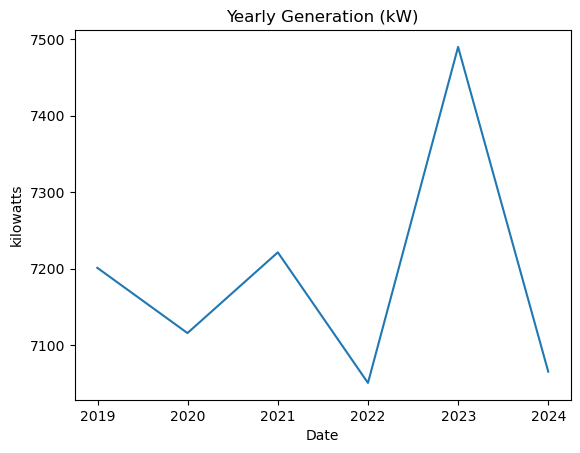

In [292]:
# Use seaborn to create lineplot, specifying date on x-axis, and meant on y-axis
ax = sns.lineplot(data=yrly_gen, x="time", y="P")

# Specify plot title
ax.set_title('Yearly Generation (kW)')

# Adjust names of axes.
ax.set_xlabel('Date')
ax.set_ylabel('kilowatts');

## Usage